In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb
sb.set_style('darkgrid')
rcParams['figure.figsize'] = 8,8
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
%cd "drive/MyDrive"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


In [ ]:
#import data
train = pd.read_csv('Train.csv')
train= train
test=  pd.read_csv('Test.csv')
test= test
submission = pd.read_csv('SampleSubmission.csv')

In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [ ]:
train.shape

(2154048, 19)

In [ ]:
#view the data types in the train data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [ ]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [ ]:
test.shape

(380127, 18)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380127 entries, 0 to 380126
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         380127 non-null  object 
 1   REGION          230399 non-null  object 
 2   TENURE          380127 non-null  object 
 3   MONTANT         247072 non-null  float64
 4   FREQUENCE_RECH  247072 non-null  float64
 5   REVENUE         252754 non-null  float64
 6   ARPU_SEGMENT    252754 non-null  float64
 7   FREQUENCE       252754 non-null  float64
 8   DATA_VOLUME     193087 non-null  float64
 9   ON_NET          241613 non-null  float64
 10  ORANGE          222897 non-null  float64
 11  TIGO            153126 non-null  float64
 12  ZONE1           29861 non-null   float64
 13  ZONE2           24076 non-null   float64
 14  MRG             380127 non-null  object 
 15  REGULARITY      380127 non-null  int64  
 16  TOP_PACK        221348 non-null  object 
 17  FREQ_TOP_P

In [ ]:
submission.head()

,user_id,CHURN
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,0


In [ ]:
submission.shape

(380127, 2)

DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: REGION, dtype: int64


Text(0.5, 0, 'REGION')

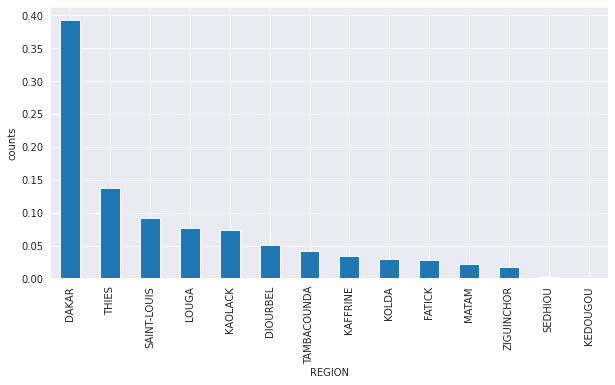

In [ ]:
print(train['REGION'].value_counts())
plt.figure(figsize=(10,5))
train['REGION'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('REGION')

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64


Text(0.5, 0, 'TENURE')

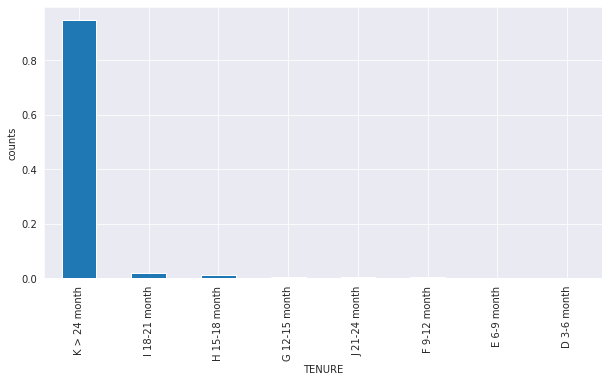

In [ ]:
print(train['TENURE'].value_counts())
plt.figure(figsize=(10,5))
train['TENURE'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TENURE')

NO    2154048
Name: MRG, dtype: int64


Text(0.5, 0, 'MRG')

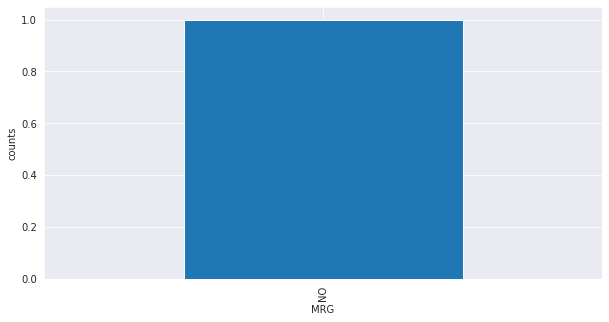

In [ ]:
print(train['MRG'].value_counts())
plt.figure(figsize=(10,5))
train['MRG'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('MRG')

All-net 500F=2000F;5d             317802
On net 200F=Unlimited _call24H    152295
Data:490F=1GB,7d                  115180
Data: 100 F=40MB,24H               84649
Mixt 250F=Unlimited_call24H        67512
                                   ...  
301765007                              1
GPRS_BKG_1000F MIFI                    1
APANews_monthly                        1
CVM_100f=500 onNet                     1
Data_Mifi_20Go                         1
Name: TOP_PACK, Length: 140, dtype: int64


Text(0.5, 0, 'TOP_PACK')

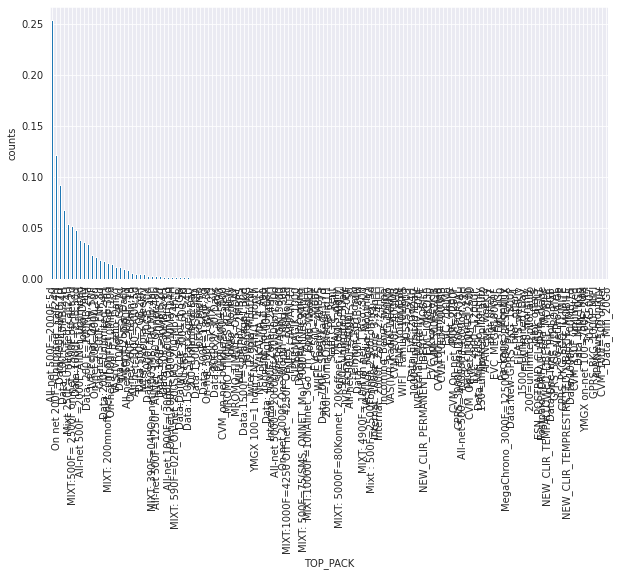

In [ ]:

print(train['TOP_PACK'].value_counts())
plt.figure(figsize=(10,5))
train['TOP_PACK'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('TOP_PACK')

0    1750062
1     403986
Name: CHURN, dtype: int64


Text(0.5, 0, 'Churn')

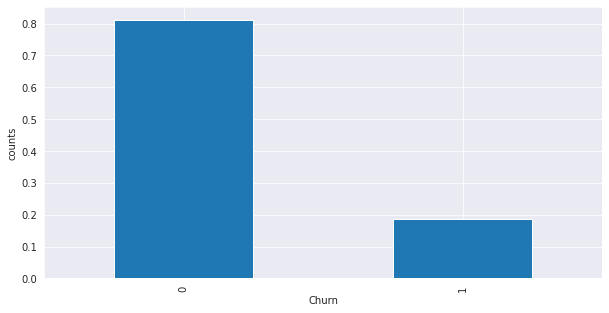

In [ ]:
print(train['CHURN'].value_counts())
plt.figure(figsize=(10,5))
train['CHURN'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('Churn')

In [ ]:
#Check for missing values in training data
train.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [ ]:
#Check for missing values in test data
test.isnull().sum()

user_id                0
REGION            149728
TENURE                 0
MONTANT           133055
FREQUENCE_RECH    133055
REVENUE           127373
ARPU_SEGMENT      127373
FREQUENCE         127373
DATA_VOLUME       187040
ON_NET            138514
ORANGE            157230
TIGO              227001
ZONE1             350266
ZONE2             356051
MRG                    0
REGULARITY             0
TOP_PACK          158779
FREQ_TOP_PACK     158779
dtype: int64

In [ ]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


Data Pre Processing

In [ ]:
train.drop(['user_id', 'MRG',], 1, inplace = True)
test.drop(['user_id', 'MRG',], 1, inplace = True)

Data Engineering

In [ ]:
train.REGION.fillna('REG',inplace=True)
test.REGION.fillna('REG',inplace=True)

In [ ]:
train.TOP_PACK.fillna('PACK',inplace=True)
test.TOP_PACK.fillna('PACK',inplace=True)

In [ ]:
minus_999999 = ['MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','FREQ_TOP_PACK','TIGO','ZONE1','ZONE2']

In [ ]:
for col in minus_999999:
    train[col].fillna(-99999, inplace=True)
    test[col].fillna(-99999, inplace=True)

In [ ]:
data = pd.concat([train,test],axis=0)
data = data.reset_index(drop=True)

In [ ]:
def tenure(x):
    'function to encode the Tenure based on the lowest amount of month spent'
    if x == 'K > 24 month':
        return 24
    elif x == 'H 15-18 month':
        return 15
    elif x == 'G 12-15 month':
        return 12
    elif x == 'J 21-24 month':
        return 21
    elif x == 'I 18-21 month':
        return 18
    elif x == 'E 6-9 month':
        return 6
    elif x == 'F 9-12 month':
        return 9
    elif x == 'D 3-6 month':
        return 3
    else:
        pass

In [ ]:
data.TENURE = data.TENURE.apply(tenure)

In [ ]:
categ = ['REGION','TOP_PACK'] 

In [ ]:
len(data.REGION.unique()), len(data.TOP_PACK.unique())

(15, 143)

In [ ]:
data = pd.get_dummies(data, prefix = categ, columns = categ)

In [ ]:
data.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_REG,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TOP_PACK_1000=Unlimited7Day,TOP_PACK_1500=Unlimited7Day,TOP_PACK_150=unlimited pilot auto,TOP_PACK_200=Unlimited1Day,TOP_PACK_200=unlimited pilot auto,TOP_PACK_200F=10mnOnNetValid1H,TOP_PACK_301765007,TOP_PACK_305155009,TOP_PACK_500=Unlimited3Day,TOP_PACK_APANews_monthly,...,TOP_PACK_Mixt : 500F=2500Fonnet_2500Foffnet ;5d,TOP_PACK_NEW_CLIR_PERMANENT_LIBERTE_MOBILE,TOP_PACK_NEW_CLIR_TEMPALLOWED_LIBERTE_MOBILE,TOP_PACK_NEW_CLIR_TEMPRESTRICTED_LIBERTE_MOBILE,TOP_PACK_New_YAKALMA_4_ALL,TOP_PACK_On net 200F= 3000F_10Mo ;24H,TOP_PACK_On net 200F=Unlimited _call24H,TOP_PACK_On-net 1000F=10MilF;10d,TOP_PACK_On-net 2000f_One_Month_100H; 30d,TOP_PACK_On-net 200F=60mn;1d,TOP_PACK_On-net 300F=1800F;3d,"TOP_PACK_On-net 500=4000,10d",TOP_PACK_On-net 500F_FNF;3d,TOP_PACK_PACK,TOP_PACK_Package3_Monthly,TOP_PACK_Pilot_Youth1_290,TOP_PACK_Pilot_Youth4_490,TOP_PACK_Postpaid FORFAIT 10H Package,TOP_PACK_SMS Max,TOP_PACK_SUPERMAGIK_1000,TOP_PACK_SUPERMAGIK_5000,TOP_PACK_Staff_CPE_Rent,TOP_PACK_TelmunCRBT_daily,TOP_PACK_Twter_U2opia_Daily,TOP_PACK_Twter_U2opia_Monthly,TOP_PACK_Twter_U2opia_Weekly,TOP_PACK_VAS(IVR_Radio_Daily),TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_VAS(IVR_Radio_Weekly),TOP_PACK_WIFI_ Family _10MBPS,TOP_PACK_WIFI_ Family _4MBPS,TOP_PACK_WIFI_Family_2MBPS,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month","TOP_PACK_YMGX on-net 100=700F, 24H",TOP_PACK_Yewouleen_PKG,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer4,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TOP_PACK_pilot_offer7
0,24,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4,-99999.0,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,24,3600.0,2.0,1020.0,340.0,2.0,-99999.0,90.0,46.0,7.0,-99999.0,-99999.0,17,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,24,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,-99999.0,-99999.0,62,11.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24,1000.0,1.0,985.0,328.0,1.0,-99999.0,39.0,24.0,-99999.0,-99999.0,-99999.0,11,2.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['income_per_topup_amount'] = data['REVENUE'] / data['MONTANT']
data['active_per_duration'] =  data['TENURE'] / data['REGULARITY']
data['income_to_amount_ratio'] = data['REVENUE'] / data['MONTANT']
data['income_left_after_top_up'] = data['REVENUE'] - data['MONTANT']
data['tenure_to_topup_frequency'] = data['TENURE'] / data['FREQUENCE_RECH']
data['income_in90days_perRevenue'] = data['ARPU_SEGMENT'] / data['REVENUE'] 

In [ ]:
train=data[data.CHURN.notnull()].reset_index(drop=True)
test=data[data.CHURN.isna()].reset_index(drop=True)

In [ ]:
y = train.CHURN
train.drop('CHURN', axis=1, inplace=True)
test.drop('CHURN', axis=1, inplace=True)

In [ ]:
test.head(2)
train.shape

(2154048, 178)

In [ ]:
train.shape, y.shape, test.shape

((2154048, 178), (2154048,), (380127, 178))

In [ ]:
train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_REG,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TOP_PACK_1000=Unlimited7Day,TOP_PACK_1500=Unlimited7Day,TOP_PACK_150=unlimited pilot auto,TOP_PACK_200=Unlimited1Day,TOP_PACK_200=unlimited pilot auto,TOP_PACK_200F=10mnOnNetValid1H,TOP_PACK_301765007,TOP_PACK_305155009,TOP_PACK_500=Unlimited3Day,TOP_PACK_APANews_monthly,TOP_PACK_APANews_weekly,...,TOP_PACK_On net 200F=Unlimited _call24H,TOP_PACK_On-net 1000F=10MilF;10d,TOP_PACK_On-net 2000f_One_Month_100H; 30d,TOP_PACK_On-net 200F=60mn;1d,TOP_PACK_On-net 300F=1800F;3d,"TOP_PACK_On-net 500=4000,10d",TOP_PACK_On-net 500F_FNF;3d,TOP_PACK_PACK,TOP_PACK_Package3_Monthly,TOP_PACK_Pilot_Youth1_290,TOP_PACK_Pilot_Youth4_490,TOP_PACK_Postpaid FORFAIT 10H Package,TOP_PACK_SMS Max,TOP_PACK_SUPERMAGIK_1000,TOP_PACK_SUPERMAGIK_5000,TOP_PACK_Staff_CPE_Rent,TOP_PACK_TelmunCRBT_daily,TOP_PACK_Twter_U2opia_Daily,TOP_PACK_Twter_U2opia_Monthly,TOP_PACK_Twter_U2opia_Weekly,TOP_PACK_VAS(IVR_Radio_Daily),TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_VAS(IVR_Radio_Weekly),TOP_PACK_WIFI_ Family _10MBPS,TOP_PACK_WIFI_ Family _4MBPS,TOP_PACK_WIFI_Family_2MBPS,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month","TOP_PACK_YMGX on-net 100=700F, 24H",TOP_PACK_Yewouleen_PKG,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer4,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TOP_PACK_pilot_offer7,income_per_topup_amount,active_per_duration,income_to_amount_ratio,income_left_after_top_up,tenure_to_topup_frequency,income_in90days_perRevenue
0,24,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000235,0.444444,1.000235,1.0,1.60000,0.333333
1,18,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4,-99999.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,4.500000,1.000000,0.0,-0.00018,1.000000
2,24,3600.0,2.0,1020.0,340.0,2.0,-99999.0,90.0,46.0,7.0,-99999.0,-99999.0,17,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.283333,1.411765,0.283333,-2580.0,12.00000,0.333333
3,24,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,-99999.0,-99999.0,62,11.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000148,0.387097,1.000148,2.0,1.60000,0.333358
4,24,1000.0,1.0,985.0,328.0,1.0,-99999.0,39.0,24.0,-99999.0,-99999.0,-99999.0,11,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.985000,2.181818,0.985000,-15.0,24.00000,0.332995


## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(train,y,test_size = 0.3,random_state=1)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1507833, 178)
(1507833,)
(646215, 178)
(646215,)


In [ ]:
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_REG,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR,TOP_PACK_1000=Unlimited7Day,TOP_PACK_1500=Unlimited7Day,TOP_PACK_150=unlimited pilot auto,TOP_PACK_200=Unlimited1Day,TOP_PACK_200=unlimited pilot auto,TOP_PACK_200F=10mnOnNetValid1H,TOP_PACK_301765007,TOP_PACK_305155009,TOP_PACK_500=Unlimited3Day,TOP_PACK_APANews_monthly,TOP_PACK_APANews_weekly,...,TOP_PACK_On net 200F=Unlimited _call24H,TOP_PACK_On-net 1000F=10MilF;10d,TOP_PACK_On-net 2000f_One_Month_100H; 30d,TOP_PACK_On-net 200F=60mn;1d,TOP_PACK_On-net 300F=1800F;3d,"TOP_PACK_On-net 500=4000,10d",TOP_PACK_On-net 500F_FNF;3d,TOP_PACK_PACK,TOP_PACK_Package3_Monthly,TOP_PACK_Pilot_Youth1_290,TOP_PACK_Pilot_Youth4_490,TOP_PACK_Postpaid FORFAIT 10H Package,TOP_PACK_SMS Max,TOP_PACK_SUPERMAGIK_1000,TOP_PACK_SUPERMAGIK_5000,TOP_PACK_Staff_CPE_Rent,TOP_PACK_TelmunCRBT_daily,TOP_PACK_Twter_U2opia_Daily,TOP_PACK_Twter_U2opia_Monthly,TOP_PACK_Twter_U2opia_Weekly,TOP_PACK_VAS(IVR_Radio_Daily),TOP_PACK_VAS(IVR_Radio_Monthly),TOP_PACK_VAS(IVR_Radio_Weekly),TOP_PACK_WIFI_ Family _10MBPS,TOP_PACK_WIFI_ Family _4MBPS,TOP_PACK_WIFI_Family_2MBPS,"TOP_PACK_YMGX 100=1 hour FNF, 24H/1 month","TOP_PACK_YMGX on-net 100=700F, 24H",TOP_PACK_Yewouleen_PKG,TOP_PACK_pack_chinguitel_24h,TOP_PACK_pilot_offer4,TOP_PACK_pilot_offer5,TOP_PACK_pilot_offer6,TOP_PACK_pilot_offer7,income_per_topup_amount,active_per_duration,income_to_amount_ratio,income_left_after_top_up,tenure_to_topup_frequency,income_in90days_perRevenue
1688519,24,19000.0,63.0,19399.0,6466.0,66.0,-99999.0,5801.0,148.0,14.0,-99999.0,-99999.0,62,52.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.021000,0.387097,1.021000,399.0,0.380952,0.333316
1639889,24,7000.0,46.0,7307.0,2436.0,60.0,4056.0,9.0,3.0,-99999.0,-99999.0,-99999.0,56,53.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.043857,0.428571,1.043857,307.0,0.521739,0.333379
444059,24,1000.0,1.0,1000.0,333.0,1.0,304.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,12.000000,1.000000,0.0,24.000000,0.333000
1424683,24,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,1023.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,4,-99999.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,6.000000,1.000000,0.0,-0.000240,1.000000
1046167,24,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,12,-99999.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,2.000000,1.000000,0.0,-0.000240,1.000000


In [ ]:
#Standardize numeric columns

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
per_model = Perceptron(tol=1e-3, random_state=0).fit(X_train,y_train)
log_model = LogisticRegression(max_iter=100).fit(X_train,y_train)
dtr_model = DecisionTreeClassifier().fit(X_train,y_train)
rfc_model = RandomForestClassifier().fit(X_train,y_train)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train,y_train)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train,y_train)

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.1 MB/s 


In [ ]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier().fit(X_train,y_train)

Learning rate set to 0.234472
0:	learn: 0.4103160	total: 500ms	remaining: 8m 19s
1:	learn: 0.3192461	total: 877ms	remaining: 7m 17s
2:	learn: 0.2856743	total: 1.26s	remaining: 6m 58s
3:	learn: 0.2709156	total: 1.61s	remaining: 6m 41s
4:	learn: 0.2637051	total: 1.95s	remaining: 6m 28s
5:	learn: 0.2591688	total: 2.29s	remaining: 6m 18s
6:	learn: 0.2570461	total: 2.62s	remaining: 6m 11s
7:	learn: 0.2556938	total: 2.97s	remaining: 6m 7s
8:	learn: 0.2546841	total: 3.29s	remaining: 6m 2s
9:	learn: 0.2542150	total: 3.62s	remaining: 5m 58s
10:	learn: 0.2537896	total: 3.98s	remaining: 5m 57s
11:	learn: 0.2535881	total: 4.29s	remaining: 5m 53s
12:	learn: 0.2532999	total: 4.62s	remaining: 5m 50s
13:	learn: 0.2530373	total: 4.97s	remaining: 5m 49s
14:	learn: 0.2529177	total: 5.29s	remaining: 5m 47s
15:	learn: 0.2527854	total: 5.65s	remaining: 5m 47s
16:	learn: 0.2527060	total: 5.96s	remaining: 5m 44s
17:	learn: 0.2525840	total: 6.27s	remaining: 5m 42s
18:	learn: 0.2525531	total: 6.62s	remaining: 5

In [ ]:
per_pred = per_model.predict(X_test)
log_pred = log_model.predict(X_test)
dtr_pred = dtr_model.predict(X_test)
rfc_pred = rfc_model.predict(X_test)
ada_pred = ada_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
cat_pred = cat_model.predict(X_test)

In [ ]:
list_models = ["Perceptron","Logistic Regression","Decision Tree Classification","Random Forest Classification", "Adaboost Classification", "Gradient Boost Classification","Cat Boost Classification"]

In [ ]:
predicted_values = [per_pred,log_pred,dtr_pred,rfc_pred,ada_pred,gb_pred,cat_pred]

In [ ]:
accuracies =[metrics.accuracy_score(y_test,x) for x in predicted_values]
accuracies

[0.7724132061310864,
 0.8596411411062882,
 0.860264772560216,
 0.8766200103680664,
 0.8786920761666009,
 0.879047994862391,
 0.8793512994901078]

In [ ]:
f1scores = [metrics.f1_score(y_test,x) for x in predicted_values]
for i in f1scores:
  print(i)

0.5637717268790414
0.585157472031906
0.6466525534820565
0.6676254794063697
0.6749325117249214
0.673609748153221
0.6686246424427376


In [ ]:
recall = [metrics.recall_score(y_test,x) for x in predicted_values]
for i in recall:
  print(i)

0.7861734073442916
0.5291893814680311
0.6835287013062217
0.6624173787877534
0.6732212139010448
0.6672154066328598
0.6506787554908465


In [ ]:
precision = [metrics.precision_score(y_test,x) for x in predicted_values]
for i in precision:
  print(i)

0.439453982992458
0.6543643040538467
0.6135516447612683
0.6729161239358975
0.6766525318034422
0.6801278375552332
0.6875885098868821


In [ ]:
# import matplotlib.pyplot as plt
# plt.title('Receiver Operating Characteristic')
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# colors = ['r','b','g','y','c','m','k']
# lines = []
# for i in range(0,7):
#   fpr, tpr, threshold = metrics.roc_curve(y_test, predicted_values[i])
#   roc_auc = metrics.auc(fpr, tpr)
#   lines.append(plt.plot(fpr, tpr, label = 'AUC - '+list_models[i]+'= %0.2f' % roc_auc,color=colors[i]))
# plt.legend(lines,list_models)
# plt.show()

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_auc = roc_auc_score(y_test, ns_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

No Skill: ROC AUC=0.500


Perceptron
AUC: 0.778
Logistic Regression
AUC: 0.732
Decision Tree Classification
AUC: 0.792
Random Forest Classification
AUC: 0.794
Adaboost Classification
AUC: 0.800
Gradient Boost Classification
AUC: 0.798
Cat Boost Classification
AUC: 0.791


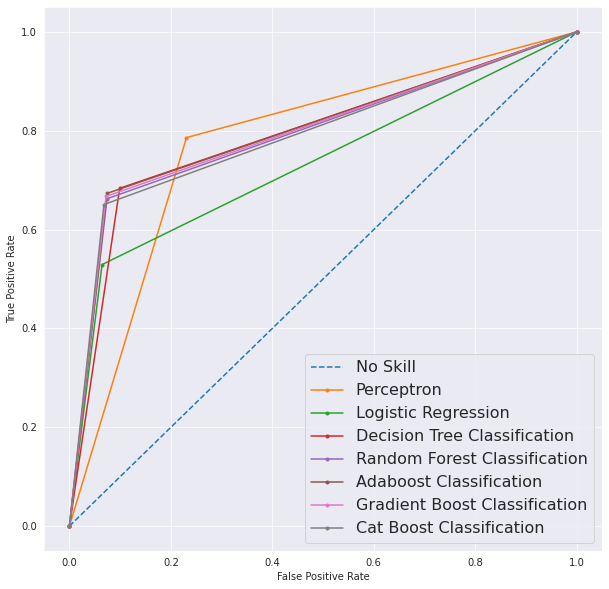

In [ ]:
f = plt.figure()
plt.rc('legend', fontsize=16)
f.set_figwidth(10)
f.set_figheight(10)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
for i in range(0,7):
  fpr, tpr, thresholds = roc_curve(y_test, predicted_values[i])
  auc = roc_auc_score(y_test, predicted_values[i])
  print(list_models[i])
  print('AUC: %.3f' % auc)
  plt.plot(fpr, tpr, marker='.', label=list_models[i])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
plt.show()